In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dane = pd.read_csv('szczescie.csv')

# 1. Opis zbioru danych

Zbiór danych opisuje poziom szczęścia w poszczególnych za pomocą różnych wskażników. Składa się on z 143 wierzsy oraz 12 kolumn.
Pierwsze dwie kolumny zawierają napisy (stringi), a w pozostałych kolumnach znajdują się zmienne liczbowe (float).

## Znaczenie kolumn
<b>Country name</b> - nazwa kraju <br>
<b>Regional indicator</b> - region w jakim znajduje się kraj <br>
<b>Ladder score</b> - wskażnik szczęścia, będący średnią z odpowiedzi ankietowanych w skali od 0 do 10 na ile są szczęśliwi <br>
<b>upperwhisker</b> - górna granica wskażnika szczęścia <br>
<b>lowerwhisker</b> - dolna granica wskażnika szczęścia <br>
<b>Log GDP per capita</b> -  Logarytm naturalny PKB per capita kraju, skorygowany o parytet siły nabywczej (PPP), aby uwzględnić różnice w kosztach życia między krajami </b><br>
<b>Social support</b> - Średnia krajowa odpowiedzi binarnych (0 lub 1, reprezentujących odpowiedzi Nie/Tak) na pytanie o posiadanie krewnych lub przyjaciół, na których można liczyć w trudnych chwilach <br>
<b>Healthy life expectancy</b> - Średnia liczba lat, które noworodek przeżyłby w dobrym zdrowiu, oparta na wskaźnikach śmiertelności i oczekiwanej długości życia w różnym wieku <br>
<b>Freedom to make life choices</b> - Średnia krajowa odpowiedzi na pytanie o zadowolenie z wolności wyboru, co robić ze swoim życiem <br>
<b>Generosity</b> -  Resztowa wartość z regresji średniej krajowej odpowiedzi na pytanie o darowizny na cele charytatywne na PKB per capita <br>
<b>Perceptions of corruption</b> - Średnia krajowa odpowiedzi na pytania o postrzegany stopień korupcji w rządzie i biznesie <br>
<b>Dystopia + residual</b> - Dystopia to wyimaginowany kraj z najbardziej nieszczęśliwymi ludźmi na świecie, używany jako punkt odniesienia do porównań. Wartość Dystopia + residual to kombinacja wyniku dystopii i niewyjaśnionej resztowej wartości dla każdego kraju, co zapewnia, że łączny wynik jest zawsze dodatni. Każdy z tych czynników przyczynia się do ogólnego wyniku szczęścia, ale wartość dystopia + resztowa jest punktem odniesienia, który zapewnia, że żaden kraj nie ma niższego wyniku niż hipotetyczna dystopia

# 2. Analiza zmiennych

In [63]:
liczbowe = dane.iloc[:, 2:12]
liczbowe.mean()

Ladder score                    1.170717
upperwhisker                    1.155008
lowerwhisker                    1.187133
Log GDP per capita              0.425098
Social support                  0.333317
Healthy life expectancy         0.164923
Freedom to make life choices    0.162492
Generosity                      0.073441
Perceptions of corruption       0.126238
Dystopia + residual             0.537459
dtype: float64

In [64]:
liczbowe.std()

Ladder score                    1.170717
upperwhisker                    1.155008
lowerwhisker                    1.187133
Log GDP per capita              0.425098
Social support                  0.333317
Healthy life expectancy         0.164923
Freedom to make life choices    0.162492
Generosity                      0.073441
Perceptions of corruption       0.126238
Dystopia + residual             0.537459
dtype: float64

In [65]:
liczbowe.max()

Ladder score                    7.741
upperwhisker                    7.815
lowerwhisker                    7.667
Log GDP per capita              2.141
Social support                  1.617
Healthy life expectancy         0.857
Freedom to make life choices    0.863
Generosity                      0.401
Perceptions of corruption       0.575
Dystopia + residual             2.998
dtype: float64

In [66]:
liczbowe.min()

Ladder score                    1.721
upperwhisker                    1.775
lowerwhisker                    1.667
Log GDP per capita              0.000
Social support                  0.000
Healthy life expectancy         0.000
Freedom to make life choices    0.000
Generosity                      0.000
Perceptions of corruption       0.000
Dystopia + residual            -0.073
dtype: float64

In [67]:
liczbowe.median()

Ladder score                    5.7850
upperwhisker                    5.8950
lowerwhisker                    5.6740
Log GDP per capita              1.4315
Social support                  1.2375
Healthy life expectancy         0.5495
Freedom to make life choices    0.6410
Generosity                      0.1365
Perceptions of corruption       0.1205
Dystopia + residual             1.6445
dtype: float64

In [73]:
liczbowe.quantile(0.75)-liczbowe.quantile(0.25) #IQR

Ladder score                    1.69000
upperwhisker                    1.66200
lowerwhisker                    1.71300
Log GDP per capita              0.66375
Social support                  0.46150
Healthy life expectancy         0.25050
Freedom to make life choices    0.20850
Generosity                      0.10150
Perceptions of corruption       0.12500
Dystopia + residual             0.57350
dtype: float64

In [75]:
liczbowe.kurt()

Ladder score                   -0.181577
upperwhisker                   -0.097284
lowerwhisker                   -0.251821
Log GDP per capita             -0.348987
Social support                  0.510899
Healthy life expectancy        -0.373817
Freedom to make life choices    1.305890
Generosity                      0.845147
Perceptions of corruption       2.012911
Dystopia + residual             0.801369
dtype: float64

In [76]:
liczbowe.skew()

Ladder score                   -0.521820
upperwhisker                   -0.547456
lowerwhisker                   -0.499001
Log GDP per capita             -0.507127
Social support                 -0.992283
Healthy life expectancy        -0.546061
Freedom to make life choices   -1.018833
Generosity                      0.663054
Perceptions of corruption       1.524926
Dystopia + residual            -0.601796
dtype: float64

# 3. Analiza zmiennych w zależności od regionu

In [81]:
dane.groupby("Regional indicator").mean()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,,,
Central and Eastern Europe,6.170941,6.267529,6.074235,1.637765,1.390706,0.610412,0.650471,0.135353,0.089353,1.656706
Commonwealth of Independent States,5.538500,5.637500,5.439400,1.401000,1.254556,0.543556,0.697444,0.143111,0.122333,1.404667
East Asia,5.934333,6.022667,5.846333,1.700333,1.302000,0.681833,0.587667,0.122167,0.200000,1.340833
Latin America and Caribbean,6.143368,6.268263,6.018474,1.328211,1.267316,0.571158,0.703263,0.106789,0.109211,2.057474
Middle East and North Africa,5.199941,5.312294,5.087529,1.460533,1.084200,0.553200,0.493667,0.108000,0.146067,1.325067
North America and ANZ,6.927750,7.012000,6.843250,1.860750,1.459750,0.652000,0.704500,0.226000,0.335000,1.689250
South Asia,3.895667,3.996500,3.795000,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500
Southeast Asia,5.551889,5.662111,5.441556,1.374333,1.144556,0.520222,0.765000,0.223333,0.164556,1.360111
Sub-Saharan Africa,4.329686,4.476200,4.183314,0.904171,0.788714,0.297686,0.515486,0.150400,0.111429,1.562086


In [82]:
dane.groupby("Regional indicator").median()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,,,
Central and Eastern Europe,6.2570,6.3320,6.1820,1.7000,1.4450,0.5980,0.6320,0.1270,0.0680,1.6400
Commonwealth of Independent States,5.5845,5.6775,5.4910,1.4330,1.3150,0.5390,0.6800,0.1380,0.1210,1.4510
East Asia,6.0155,6.1025,5.9265,1.8005,1.2925,0.7100,0.5935,0.1290,0.1830,1.5320
Latin America and Caribbean,6.1880,6.3060,6.0700,1.3980,1.2690,0.5490,0.7200,0.1000,0.0800,1.9070
Middle East and North Africa,4.9750,5.0850,4.8660,1.3770,1.1360,0.5630,0.4900,0.0910,0.1720,1.7410
North America and ANZ,6.9645,7.0445,6.8845,1.8470,1.4600,0.6825,0.7380,0.2255,0.3455,1.6585
South Asia,3.9760,4.0705,3.8815,1.0955,0.6265,0.4300,0.6180,0.1440,0.1015,0.8375
Southeast Asia,5.9750,6.0780,5.8580,1.3310,1.1460,0.4720,0.7960,0.1700,0.1360,1.4630
Sub-Saharan Africa,4.3770,4.5100,4.2450,0.8310,0.7510,0.3010,0.5230,0.1450,0.1070,1.6600


In [83]:
dane.groupby("Regional indicator").var()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,,,
Central and Eastern Europe,0.244830,0.235074,0.255028,0.018305,0.024518,0.001367,0.009017,0.004221,0.008899,0.136967
Commonwealth of Independent States,0.231024,0.225146,0.237365,0.034142,0.043347,0.001178,0.008515,0.009105,0.005480,0.102476
East Asia,0.159020,0.160637,0.157557,0.049217,0.016318,0.026467,0.007676,0.005337,0.013051,0.272243
Latin America and Caribbean,0.142081,0.135935,0.150376,0.133455,0.012876,0.004306,0.005920,0.001132,0.005094,0.138695
Middle East and North Africa,1.588493,1.583667,1.595745,0.112380,0.077301,0.009694,0.050361,0.004495,0.006032,0.470614
North America and ANZ,0.022945,0.021237,0.024983,0.003058,0.003038,0.005514,0.006356,0.000009,0.016605,0.021855
South Asia,1.385491,1.447396,1.326097,0.060202,0.194502,0.015645,0.082382,0.001542,0.002156,0.516236
Southeast Asia,0.607649,0.589620,0.625695,0.122243,0.029224,0.012982,0.015556,0.013366,0.026498,0.221911
Sub-Saharan Africa,0.495721,0.483459,0.510330,0.074666,0.067339,0.007555,0.014700,0.004265,0.003430,0.373458


# 4.Wykresy analizujące rozkład zmiennych

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

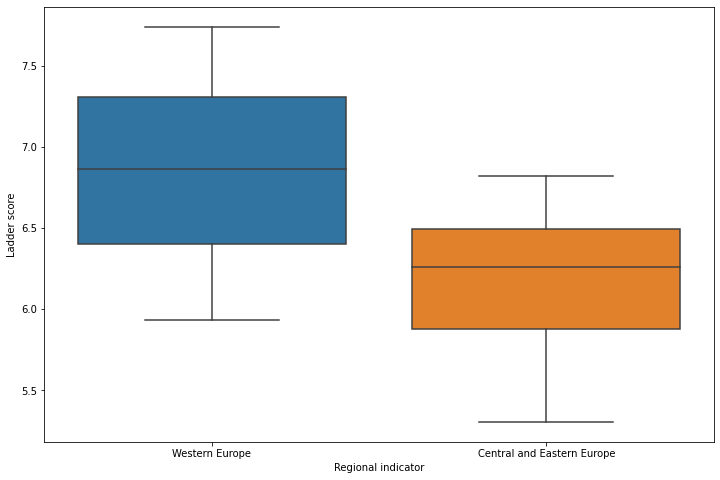

In [121]:
plt.figure(figsize=(12, 8))
europa = dane["Regional indicator"]
filtr = europa.str.contains('Europe')
europa = dane[filtr]
sns.boxplot(data=europa, x = "Regional indicator", y = "Ladder score")

Wykres przedstawia rozkład wskażnika szczęścia w europie zachodniej oraz europie środkowo-wschodniej. Widzimy, że w europie zachodniej rozstęp oraz rozrzut danych jest większy. Jednocześnie w tej części Europy wskażnik szczęścia jest na wyższym poziomie. Dla Europy zachodniej mediana wynosi niemal 7, podczas gdy w Europie  to niespełna 6,5. Zatem wnioskiem jest, że ludzie w Europie zachodniej są średnio bardziej szcześliwi od ludzi w środkowo-wschodniej Europie

<AxesSubplot:xlabel='Regional indicator', ylabel='Freedom to make life choices'>

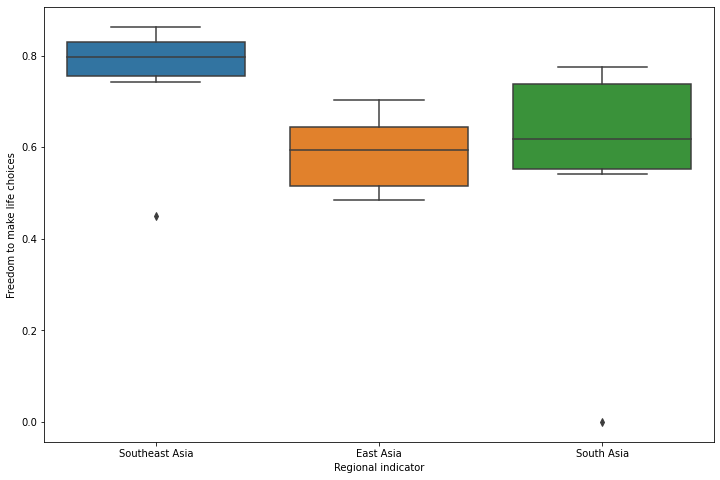

In [129]:
plt.figure(figsize=(12, 8))
azja = dane["Regional indicator"]
filtr = azja.str.contains('Asia')
azja = dane[filtr]
sns.boxplot(data=azja, x = "Regional indicator", y = "Freedom to make life choices")

Wykres przedstawia rozkład wolności w podejmowaniu decyzji w poszczególnych Azji. Widzimy, że najwyższa mediana jest dla południowo-wschodniej Azji, jednocześnie w tym regionie dane są najmniej rozrzucone. Mediany w południowej Azji  i wschodniej Azji są zbliżone i mają większy rozrzut niż Azja południowo-wschodnia. Wnioskiem jest, że największą wolność w podejmowaniu decyzji mają mieszkańcy południowo-wschodniej Azji i są co do tego zdecydowani. Mieszkańcy pozostałych regionów są mniej zodowoleni z wolności w podejmowaniu decyzji, ale zdania są bardziej podzielone

# 5.Wykresy analizujące zależności zmiennych

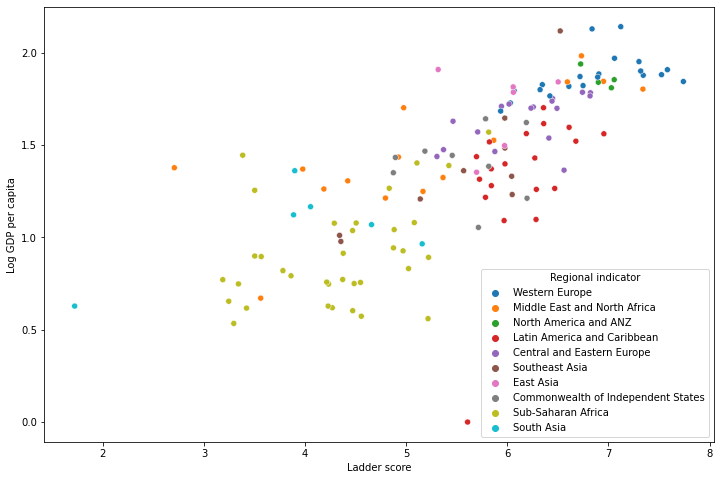

In [131]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dane, x='Ladder score', y='Log GDP per capita', hue='Regional indicator')
plt.show()

Widzimy, że wraz ze wzrostem wskażnika szczęścia rośnie PKB, przy czym najmniejsze wartościu obu tych wskażników mają kraje z Afryki, a największe kraje z Europy zachodniej. Zatem w bogatszych krajach ludzie są szczęśliwsi

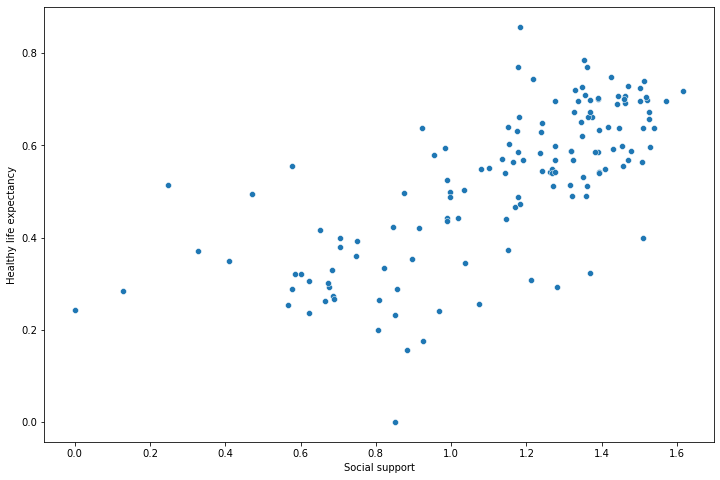

In [134]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dane, x='Social support', y='Healthy life expectancy')
plt.show()

Wzrost wsparcia społecznego idzie w parze ze wzrostem wskażnika oczekiwanej długości życia. Ludzie, którzy mają wsparcie wśród swoich bliskich mają dłuższą oczekiwaną długość życia